# Assignment 1: Pixel Regression.

Can we recover an image by learning a deep regression map from pixels $(x,y)$ to colors $(r,g,b)$?

Our target image will be Mona Lisa:

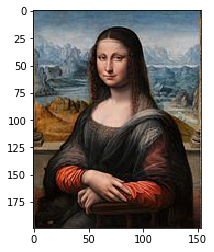

(199, 153, 3)

In [1]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

im = mpimg.imread("data/monalisa.jpg")

plt.imshow(im)
plt.show()
im.shape

Ourt training dataset will be composed of pixels locatiions and input and pixel values as output:

In [2]:
X_train = []
Y_train = []
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        X_train.append([float(i),float(j)])
        Y_train.append(im[i][j])
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print('Samples:', X_train.shape[0])
print('(x,y):', X_train[0],'\n', '(r,g,b):',Y_train[0])

Samples: 30447
(x,y): [0. 0.] 
 (r,g,b): [ 85 105 116]


Our objective is to train a deep MLP that is able to reconstruct the image:

![alt text](images/result.png)


# Model with 5 hidden layers

In [3]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn import preprocessing
from keras.optimizers import *
from keras.initializers import *

# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

model = Sequential()

model.add(Dense(units=500, input_shape=(2,), 
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500, 
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500,
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500,
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500,
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=3, 
                kernel_initializer='normal', 
                bias_initializer='zeros'))

model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1503      
Total params: 1,005,003
Trainable params: 1,005,003
Non-trainable params: 0
_________________________________________________________________


In [4]:
# construct two scalers, one for the features and one for the targets 
# (default range values are 0-1)
scaler_features = preprocessing.MinMaxScaler()
scaler_target = preprocessing.MinMaxScaler()

# scale features and targets between 0 and 1
X_train_scaled = scaler_features.fit_transform(X_train)
Y_train_scaled = scaler_target.fit_transform(Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [145]:
# use this cell to find the best model architecture
model.fit(X_train_scaled, Y_train_scaled, epochs=250, shuffle=True, verbose=1, batch_size=32, initial_epoch=245)

Epoch 246/250
30447/30447 [==============================] - 18s 600us/step - loss: 0.0051 - acc: 0.8484
Epoch 247/250
30447/30447 [==============================] - 18s 595us/step - loss: 0.0053 - acc: 0.8465
Epoch 248/250
30447/30447 [==============================] - 18s 597us/step - loss: 0.0051 - acc: 0.8459
Epoch 249/250
30447/30447 [==============================] - 20s 643us/step - loss: 0.0056 - acc: 0.8415
Epoch 250/250
30447/30447 [==============================] - 18s 578us/step - loss: 0.0051 - acc: 0.8412


In [ ]:
# predict 
Y_pred = model.predict(X_train_scaled, batch_size=10000)

# convert targets back to the original scale
Y = scaler_target.inverse_transform(Y_pred)

k = 0
# create an empty image of type unsigned int (8 bits) and same shape as the original
im_out = np.empty(shape=im.shape, dtype=np.uint8)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.savefig("mymona_250_00051.png")
plt.show()

# Model with 4 hidden layers

In [5]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn import preprocessing
from keras.optimizers import *
from keras.initializers import *

# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

model = Sequential()

model.add(Dense(units=500, input_shape=(2,), 
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500, 
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500,
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=500,
                kernel_initializer='normal',
                bias_initializer='zeros',
                activation='relu'))

model.add(Dense(units=3, 
                kernel_initializer='normal', 
                bias_initializer='zeros'))

model.compile(loss='mean_squared_error', 
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=10e-6))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 1503      
Total params: 754,503
Trainable params: 754,503
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train_scaled, Y_train_scaled, epochs=1500, shuffle=True, verbose=1, batch_size=32, initial_epoch=1000)

Epoch 1001/1500
30447/30447 [==============================] - 12s 407us/step - loss: 0.0018
Epoch 1002/1500
30447/30447 [==============================] - 12s 404us/step - loss: 0.0018
Epoch 1003/1500
30447/30447 [==============================] - 13s 416us/step - loss: 0.0019
Epoch 1004/1500
30447/30447 [==============================] - 12s 391us/step - loss: 0.0018
Epoch 1005/1500
30447/30447 [==============================] - 11s 368us/step - loss: 0.0018
Epoch 1006/1500
30447/30447 [==============================] - 11s 365us/step - loss: 0.0018
Epoch 1007/1500
30447/30447 [==============================] - 11s 365us/step - loss: 0.0018
Epoch 1008/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0018
Epoch 1009/1500
30447/30447 [==============================] - 12s 410us/step - loss: 0.0018
Epoch 1010/1500
30447/30447 [==============================] - 12s 399us/step - loss: 0.0018
Epoch 1011/1500
30447/30447 [==============================] - 12s 402

30447/30447 [==============================] - 11s 376us/step - loss: 0.0018
Epoch 1090/1500
30447/30447 [==============================] - 12s 378us/step - loss: 0.0018
Epoch 1091/1500
30447/30447 [==============================] - 11s 375us/step - loss: 0.0017
Epoch 1092/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1093/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0018
Epoch 1094/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1095/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1096/1500
30447/30447 [==============================] - 11s 376us/step - loss: 0.0018
Epoch 1097/1500
30447/30447 [==============================] - 12s 378us/step - loss: 0.0017
Epoch 1098/1500
30447/30447 [==============================] - 11s 376us/step - loss: 0.0018
Epoch 1099/1500
30447/30447 [==============================] - 11s 377us/step - loss: 

30447/30447 [==============================] - 12s 378us/step - loss: 0.0017
Epoch 1178/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1179/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1180/1500
30447/30447 [==============================] - 12s 378us/step - loss: 0.0017
Epoch 1181/1500
30447/30447 [==============================] - 12s 380us/step - loss: 0.0017
Epoch 1182/1500
30447/30447 [==============================] - 12s 378us/step - loss: 0.0017
Epoch 1183/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1184/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1185/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0017
Epoch 1186/1500
30447/30447 [==============================] - 12s 379us/step - loss: 0.0017
Epoch 1187/1500
30447/30447 [==============================] - 11s 377us/step - loss: 

30447/30447 [==============================] - 11s 369us/step - loss: 0.0016
Epoch 1266/1500
30447/30447 [==============================] - 11s 368us/step - loss: 0.0016
Epoch 1267/1500
30447/30447 [==============================] - 11s 375us/step - loss: 0.0016
Epoch 1268/1500
30447/30447 [==============================] - 11s 369us/step - loss: 0.0016
Epoch 1269/1500
30447/30447 [==============================] - 11s 367us/step - loss: 0.0016
Epoch 1270/1500
30447/30447 [==============================] - 11s 370us/step - loss: 0.0016
Epoch 1271/1500
30447/30447 [==============================] - 11s 369us/step - loss: 0.0016
Epoch 1272/1500
30447/30447 [==============================] - 11s 368us/step - loss: 0.0016
Epoch 1273/1500
30447/30447 [==============================] - 11s 369us/step - loss: 0.0016
Epoch 1274/1500
30447/30447 [==============================] - 11s 368us/step - loss: 0.0016
Epoch 1275/1500
30447/30447 [==============================] - 11s 369us/step - loss: 

30447/30447 [==============================] - 11s 368us/step - loss: 0.0015
Epoch 1354/1500
30447/30447 [==============================] - 11s 374us/step - loss: 0.0015
Epoch 1355/1500
30447/30447 [==============================] - 13s 423us/step - loss: 0.0015
Epoch 1356/1500
30447/30447 [==============================] - 13s 426us/step - loss: 0.0015
Epoch 1357/1500
30447/30447 [==============================] - 12s 404us/step - loss: 0.0015
Epoch 1358/1500
30447/30447 [==============================] - 12s 401us/step - loss: 0.0015
Epoch 1359/1500
30447/30447 [==============================] - 12s 399us/step - loss: 0.0015
Epoch 1360/1500
30447/30447 [==============================] - 12s 395us/step - loss: 0.0015
Epoch 1361/1500
30447/30447 [==============================] - 12s 396us/step - loss: 0.0015
Epoch 1362/1500
30447/30447 [==============================] - 12s 396us/step - loss: 0.0015
Epoch 1363/1500
30447/30447 [==============================] - 12s 396us/step - loss: 

30447/30447 [==============================] - 12s 380us/step - loss: 0.0015
Epoch 1442/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0015
Epoch 1443/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0015
Epoch 1444/1500
30447/30447 [==============================] - 11s 378us/step - loss: 0.0015
Epoch 1445/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0015
Epoch 1446/1500
30447/30447 [==============================] - 11s 377us/step - loss: 0.0015
Epoch 1447/1500
30447/30447 [==============================] - 12s 381us/step - loss: 0.0015
Epoch 1448/1500
30447/30447 [==============================] - 13s 430us/step - loss: 0.0015
Epoch 1449/1500
30447/30447 [==============================] - 12s 384us/step - loss: 0.0015
Epoch 1450/1500
30447/30447 [==============================] - 12s 385us/step - loss: 0.0015
Epoch 1451/1500
30447/30447 [==============================] - 13s 439us/step - loss: 

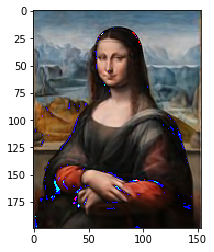

In [30]:
# predict 
Y_pred = model.predict(X_train_scaled, batch_size=10000)

# convert targets back to the original scale
Y = scaler_target.inverse_transform(Y_pred)

k = 0
# create an empty image of type unsigned int (8 bits) and same shape as the original
im_out = np.empty(shape=im.shape, dtype=np.uint8)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.savefig("reconstruction_00015.png")
plt.show()